In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

In [2]:
dtypes = {'ID_Contacto': 'object',
          'Codigo_Cliente': 'int32',
          'Nombre' : 'category',
          'Apellido' : 'category',
          'Ciudad_cliente': 'category',
          'Factura' : 'int32',
          'Tipo Factura': 'category',
          'Cod. Organización' : 'int16',
          'Desc. Organizacion': 'category',
          'Cod. Canal' : 'int8',
          'Canal' : 'category',
          'Valor Neto': 'int32',
          'Cod. Tienda': 'category',
          'Desc. Tienda':'category',
          'Ciudad Tienda' : 'category',
          'Material' : 'int32',
          'Desc. Prenda': 'category',
          'Tipo de Negocio': 'category',
          'Destino': 'category',
          'Mes de Venta': 'category',
          'Edad': 'category',
          'Género' : 'category',
          'Sublínea':'category',
          'Grupo de Artículo':'category',
          'Tipo de Artículo':'category',
          'Tipo de Tejido': 'category',
          'Tipo de Referencia': 'category',
          'Saldo': 'category',
          'Clase': 'category',
          'Concepto Diseño': 'category'}

df = pd.read_csv('../Data clean/data_clean.csv', sep = ',', dtype=dtypes,
                 parse_dates=['Fecha_compra'], infer_datetime_format=True)

df.drop(axis=1, columns='Unnamed: 0', inplace=True)

In [3]:
df.head()

,ID_Contacto,Codigo_Cliente,Nombre,Apellido,Ciudad_cliente,Fecha_compra,Factura,Tipo Factura,Cod. Organización,Desc. Organizacion,Cod. Canal,Canal,Valor Neto,Cod. Tienda,Desc. Tienda,Ciudad Tienda,Material,Desc. Prenda,Tipo de Negocio,Destino,Mes de Venta,Edad,Género,Sublínea,Grupo de Artículo,Tipo de Artículo,Tipo de Tejido,Tipo de Referencia,Saldo,Clase,Concepto Diseño
0,1023968295,42163952,"TATIANA,","BEJARANO,",BOGOTA,2019-10-19,532957168,ZPOS,1010,Org.ventas Nacional,12,Outlets,35672,T033,TIENDA OUTLET AMÉRICAS BOGOTÁ,BOGOTÁ,4210457,TENIS,LINEA,TODOS,FEBRERO,BEBES,FEMENINO,BASICOS,CALZADO,TENIS,NO TEJIDO,PRENDA EXTERIOR,ES SALDO,DESARROLLO EXTERNO,BASICOS
1,1101758193,42620506,"RICARDO,","PARDO,",BOGOTA,2019-11-30,517272874,ZPOS,1010,Org.ventas Nacional,10,Tiendas Propias,40328,T020,TIENDA PLAZA DE LAS AMERICAS,BOGOTÁ,3104161,CAMISA MANGA CORTA EN TEJIDO PLANO,NO LINEA,TODOS,NOVIEMBRE,PRIMI,MASCULINO,MODA,CAMISA,CAMISA MANGA CORTA,TEJIDO PLANO,PRENDA EXTERIOR,ES SALDO,MAQUILA,ROAD TO ALASKA
2,13886147,42702886,"ELVIS,","CASTRO,",BARRANCABERMEJ,2019-12-24,379551045,ZPOS,2010,TEXVIGAR S.A.S.,50,Tiendas Franquicias,25126,FN50,SAN SILVESTRE BARRANCABERMEJA,BARRANCABERMEJA,5226833,LEGGINGS EN TEJIDO DE PUNTO,LINEA,ALMACENES,MAYO,NIÑOS,FEMENINO,BASICOS,PANTALON LARGO,LEGGINGS,TEJIDO PUNTO,PRENDA EXTERIOR,ES SALDO,MAQUILA,BASICOS
3,66873337,40225702,"NHORA PATRICIA,","POSSO CAMPO,",TULUA,2019-12-10,556272992,ZPOS,1010,Org.ventas Nacional,10,Tiendas Propias,42008,T016,TIENDA JARDIN PLAZA,CALI,5234099,CAMISETA ML EN TEJIDO DE PUNTO,NO LINEA,ALMACENES,DICIEMBRE,NIÑOS,FEMENINO,MODA,CAMISETA,CAMISETA MANGA LARGA,TEJIDO PUNTO,PRENDA EXTERIOR,ES SALDO,MAQUILA,ROAD TO ALASKA
4,1049796773,41912337,"LORENA,","MARTINES MORENO,",BOGOTA,2019-10-02,632083527,ZPOS,1010,Org.ventas Nacional,12,Outlets,27000,T074,TIENDA OUTLET KENNEDY,BOGOTÁ,4204420,CAMISA MANGA CORTA EN TEJIDO PLANO,NO LINEA,ALMACENES,FEBRERO,BEBES,FEMENINO,MODA,CAMISA,CAMISA MANGA CORTA,TEJIDO PLANO,PRENDA EXTERIOR,ES SALDO,MAQUILA,RETRO VIBES


In [4]:
df.dtypes

ID_Contacto                   object
Codigo_Cliente                 int32
Nombre                      category
Apellido                    category
Ciudad_cliente              category
Fecha_compra          datetime64[ns]
Factura                        int32
Tipo Factura                category
Cod. Organización              int16
Desc. Organizacion          category
Cod. Canal                      int8
Canal                       category
Valor Neto                     int32
Cod. Tienda                 category
Desc. Tienda                category
Ciudad Tienda               category
Material                       int32
Desc. Prenda                category
Tipo de Negocio             category
Destino                     category
Mes de Venta                category
Edad                        category
Género                      category
Sublínea                    category
Grupo de Artículo           category
Tipo de Artículo            category
Tipo de Tejido              category
T

We will fit a linear regression model over all the provided data using the following variables:
<ol>
    <li>Dependent variable: cost</li>
    <li>Independent variables:
    <ul>
        <li>Canal
        <li>Ciudad Tienda
        <li>Edad
        <li>Género
        <li>Grupo de Artículo
        <li>Sublínea
        <li>Tipo de Tejido
        <li>Saldo
    </li>
    </ul>
        </ol>

In [5]:
model_all = smf.ols(formula = """Q("Valor Neto") ~ Canal + Q("Ciudad Tienda") +
                          Edad + Q("Género") + Q("Grupo de Artículo") + Q("Sublínea")+
                          Q("Tipo de Tejido") + Saldo""", data=df).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Valor Neto")   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                 1.168e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:26:23   Log-Likelihood:            -4.9972e+07
No. Observations:             4621542   AIC:                         9.994e+07
Df Residuals:                 4621444   BIC:                         9.995e+07
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                         -9652.2748    269.571    -35.806      0.000   -1.02e+04   -9123.925
Canal[T.Outlets Franquicias]                       3330.5672    115.783     28.766      0.000    3103.636    3557.498
Canal[T.Tiendas Franquicias]                       2.117e+04     85.809    246.715      0.000     2.1e+04    2.13e+04
Canal[T.Tiendas Propias]                           1.632e+04     13.933   1171.196      0.000    1.63e+04    1.63e+04
Q("Ciudad Tienda")[T.APARTADO]                     4739.4882    162.151     29.229      0.000    4421.677    5057.299
Q("Ciudad Tienda")[T.ARAUCA]                      -1051.8179    144.587     -7.275      0.000   -1335.202    -768.433
Q("Ciudad Tienda")[T.ARMENIA]                       959.9037    131.844      7.281      0.000     701.494    1218.313
Q("Ciudad Tienda")[T.BARRANCABERMEJA]              -557.1690    147.488     -3.778      0.000    -846.241    -268.097
Q("Ciudad Tienda")[T.BARRANQUILLA]                 -930.3425    127.754     -7.282      0.000   -1180.736    -679.949
Q("Ciudad Tienda")[T.BOGOTÁ]                       3245.5384    143.744     22.579      0.000    2963.805    3527.272
Q("Ciudad Tienda")[T.BUCARAMANGA]                   582.1211    127.629      4.561      0.000     331.972     832.270
Q("Ciudad Tienda")[T.CALI]                         3815.2212    144.940     26.323      0.000    3531.145    4099.298
Q("Ciudad Tienda")[T.CARTAGENA]                    -510.7059    127.418     -4.008      0.000    -760.440    -260.972
Q("Ciudad Tienda")[T.CARTAGO]                      5117.1256    201.105     25.445      0.000    4722.966    5511.285
Q("Ciudad Tienda")[T.CHIA]                         6949.1420    156.859     44.302      0.000    6641.704    7256.580
Q("Ciudad Tienda")[T.CUCUTA]                       -268.0475    123.417     -2.172      0.030    -509.941     -26.154
Q("Ciudad Tienda")[T.DUITAMA]                      2799.6428    155.351     18.021      0.000    2495.159    3104.126
Q("Ciudad Tienda")[T.ENVIGADO]                     5116.5876    156.328     32.730      0.000    4810.190    5422.985
Q("Ciudad Tienda")[T.FLORENCIA]                     927.6699    148.593      6.243      0.000     636.433    1218.906
Q("Ciudad Tienda")[T.GIRARDOT]                     3575.7566    162.107     22.058      0.000    3258.033    3893.481
Q("Ciudad Tienda")[T.IBAGUE]                        972.9629    131.883      7.377      0.000     714.478    1231.448
Q("Ciudad Tienda")[T.IPIALES]                      8280.0730    156.478     52.915      0.000    7973.382    8586.764
Q("Ciudad Tienda")[T.LA CEJA]                      4778.1472    183.134     26.091      0.000    4419.211    5137.083
Q("Ciudad Tiend

In [ ]:
model_all_coef

In [6]:
# Save all coeficients in a dataframe
model_all_coef = pd.DataFrame(model_all.params, columns=['value'])

# Generate subsets for each categorical variable
model_all_coef_canal = model_all_coef[model_all_coef.index.str.contains('Canal')==True].sort_values(by='value',ascending=False)
model_all_coef_ciudad = model_all_coef[model_all_coef.index.str.contains('Ciudad')==True].sort_values(by='value',ascending=False)
model_all_coef_edad = model_all_coef[model_all_coef.index.str.contains('Edad')==True].sort_values(by='value',ascending=False)
model_all_coef_genero = model_all_coef[model_all_coef.index.str.contains('Género')==True].sort_values(by='value',ascending=False)
model_all_coef_grupo_art = model_all_coef[model_all_coef.index.str.contains('Grupo de Artículo')==True].sort_values(by='value',ascending=False)
model_all_coef_sublinea = model_all_coef[model_all_coef.index.str.contains('Sublínea')==True].sort_values(by='value',ascending=False)
model_all_coef_tejido = model_all_coef[model_all_coef.index.str.contains('Tipo de Tejido')==True].sort_values(by='value',ascending=False)
model_all_coef_saldo = model_all_coef[model_all_coef.index.str.contains('Saldo')==True].sort_values(by='value',ascending=False)

In [7]:
cat_vars = ['Canal', 'Ciudad Tienda', 'Edad', 'Género', 'Grupo de Artículo',
            'Sublínea', 'Tipo de Tejido', 'Saldo']

# Print the baseline category for each variable to make the analysis easier

for var in cat_vars:
    baseline = df[var].sort_values().unique()[0]
    print('The baseline category for', var,'is :', baseline)

The baseline category for Canal is : Outlets
The baseline category for Ciudad Tienda is : AGUACHICA
The baseline category for Edad is : BEBES
The baseline category for Género is : FEMENINO
The baseline category for Grupo de Artículo is : ACCESORIO
The baseline category for Sublínea is : ACCESORIOS
The baseline category for Tipo de Tejido is : INDISTINTO
The baseline category for Saldo is : ES SALDO


<h3>Analysis for 'Canal'</h3>

In [8]:
model_all_coef_canal

,value
Canal[T.Tiendas Franquicias],21170.268043
Canal[T.Tiendas Propias],16318.358786
Canal[T.Outlets Franquicias],3330.567245


Compared to the baseline category 'Outlets', and after accounting for all other factors, "Tiendas Franquicias" shows an additional of &#36; 21.170. Meaning that this canal generates more sales than the others.

<h3>Analysis for 'Ciudad Tienda'</h3>

In [9]:
model_all_coef_ciudad.head(5)
model_all_coef_ciudad.tail(5)

,value
"Q(""Ciudad Tienda"")[T.IPIALES]",8280.072998
"Q(""Ciudad Tienda"")[T.CHIA]",6949.141977
"Q(""Ciudad Tienda"")[T.MOSQUERA]",6778.688131
"Q(""Ciudad Tienda"")[T.RIONEGRO]",5897.733798
"Q(""Ciudad Tienda"")[T.CARTAGO]",5117.125613


,value
"Q(""Ciudad Tienda"")[T.ARAUCA]",-1051.817862
"Q(""Ciudad Tienda"")[T.VALLEDUPAR]",-1713.418852
"Q(""Ciudad Tienda"")[T.RIOHACHA]",-1959.839186
"Q(""Ciudad Tienda"")[T.SANTA MARTA]",-2074.603921
"Q(""Ciudad Tienda"")[T.MONTERIA]",-2679.128581


<p>Compared to the baseline category 'AGUACHICA', and after accounting for all other factors, the store located in IPIALES shows an additional amount of sale of &#36; 8.280. The top 5 cities that generate most sales (compared to 'AGUACHICA') are IPIALES, CHIA, MOSQUERA, RIONEGRO and CARTAGO.</p>
<p>Compared to the baseline category 'AGUACHICA', and after accounting for all other factors, the store located in ARAUCA shows a reduction in sales of &#36; 1.051. The top 5 cities that generate less sales (compared to 'AGUACHICA') are ARAUCA, VALLEDUPAR, RIOACHA, SANTA MARTA, MONTERIA.</p>

<h3>Analysis for 'Edad'</h3>

In [10]:
model_all_coef_edad

,value
Edad[T.NIÑOS],5570.886530
Edad[T.PRIMI],-8861.477414


Compared to the baseline category 'BEBES', and after accounting for all other factors, the age group NIÑOS shows an additional amount of sale of $ 5.570.

<h3>Analysis for 'Genero'</h3>

In [11]:
model_all_coef_genero

,value
"Q(""Género"")[T.UNISEX]",7173.984317
"Q(""Género"")[T.VARIOS]",6187.472385
"Q(""Género"")[T.MASCULINO]",3351.805393
"Q(""Género"")[T.MASCOTAS]",-2336.394393


Compared to the baseline category 'FEMENINO', and after accounting for all other factors, the gender group UNISEX shows an additional amount of sale of $ 7.173.

<h3>Analysis for 'Grupo de Artículo'</h3>

In [12]:
model_all_coef_grupo_art.head(5)
model_all_coef_grupo_art.tail(5)

,value
"Q(""Grupo de Artículo"")[T.OVERALL]",55272.113133
"Q(""Grupo de Artículo"")[T.TENDIDO DE CAMA]",53997.461487
"Q(""Grupo de Artículo"")[T.BUZO O CHAQUETA]",53130.538621
"Q(""Grupo de Artículo"")[T.CALZADO]",52966.383457
"Q(""Grupo de Artículo"")[T.CONJUNTO]",49036.495742


,value
"Q(""Grupo de Artículo"")[T.MISCELÁNEOS]",11507.695756
"Q(""Grupo de Artículo"")[T.MEDIAS]",11015.070691
"Q(""Grupo de Artículo"")[T.HOGAR ACCESORIOS]",2486.880354
"Q(""Grupo de Artículo"")[T.PLOTTER VINILO ADHESIVO]",2025.046468
"Q(""Grupo de Artículo"")[T.CUIDADO PERSONAL]",-4698.031551


<p>Compared to the baseline category 'ACCESORIO', and after accounting for all other factors, the article group 'OVERALL'shows an additional amount of sale of &#36; 55.272. The top 5 article groups that generate most sales (compared to 'ACCESORIO') are OVERALL, TENDIDO DE CAMA, BUZO O CHAQUETA, CALZADO, CONJUNTO.</p>

<p>Compared to the baseline category 'ACCESORIO', and after accounting for all other factors, the article group  'CUIDADO PERSONAL' shows a reduction in sales of &#36; 4.698. The top 5 article groups that generate less sales (compared to 'ACCESORIO') are MISCELANEOS, MEDIAS, HOGAR ACCESORIOS, PLOTTER VINILO ADHESIVO, CUIDADO PERSONAL.</p>

<h3>Analysis for 'Sublínea'</h3>

In [13]:
model_all_coef_sublinea.head(5)
model_all_coef_sublinea.tail(5)

,value
"Q(""Sublínea"")[T.AJUAR]",14445.259511
"Q(""Sublínea"")[T.MASCOTAS]",9484.072558
"Q(""Sublínea"")[T.ESTIMULACION]",5164.464873
"Q(""Sublínea"")[T.SPECIAL]",4610.742833
"Q(""Sublínea"")[T.INVERNALES]",4414.481218


,value
"Q(""Sublínea"")[T.PLAYA]",-3342.287334
"Q(""Sublínea"")[T.BASICOS]",-3498.792710
"Q(""Sublínea"")[T.LINEA 79]",-8694.704522
"Q(""Sublínea"")[T.PIJAMAS]",-15104.546618
"Q(""Sublínea"")[T.INTERIOR]",-15722.510747


<p>Compared to the baseline category 'ACCESORIOS', and after accounting for all other factors, the subline group 'AJUAR'shows an additional amount of sale of &#36; 14.445. The top 5 subline groups that generate most sales (compared to 'ACCESORIOS') are AJUAR, MASCOTAS, ESTIMULACION, SPECIAL, INVERNALES.</p>

<p>Compared to the baseline category 'ACCESORIOS', and after accounting for all other factors, the subline group  'INTERIOR' shows a reduction in sales of &#36; 15.722 The top 5 subline groups that generate less sales (compared to 'ACCESORIOS') are PLAYA, BASICOS, LINEA 79, PIJAMAS, INTERIOR.</p>

<h3>Analysis for 'Tipo de Tejido'</h3>

In [14]:
model_all_coef_tejido

,value
"Q(""Tipo de Tejido"")[T.TEJIDO PLANO]",3352.772251
"Q(""Tipo de Tejido"")[T.NO TEJIDO]",442.969689
"Q(""Tipo de Tejido"")[T.TEJIDO PUNTO]",-6344.402180


Compared to the baseline category 'INDISTINTO', and after accounting for all other factors, the fabric type TEJIDO PLANO shows an additional amount of sale of $ 3.352.

<h3>Analysis for 'Saldo'</h3>

In [15]:
model_all_coef_saldo

,value
Saldo[T.NO SALDO],2662.247471


Compared to the baseline category 'ES SALDO', and after accounting for all other factors, the items classified as NO SALDO show an additional amount of sale of $ 2.662.

<h3>Analysis for all coeficients</h3>

In [16]:
model_all_coef.sort_values(by='value', ascending=False).head(10)

,value
"Q(""Grupo de Artículo"")[T.OVERALL]",55272.113133
"Q(""Grupo de Artículo"")[T.TENDIDO DE CAMA]",53997.461487
"Q(""Grupo de Artículo"")[T.BUZO O CHAQUETA]",53130.538621
"Q(""Grupo de Artículo"")[T.CALZADO]",52966.383457
"Q(""Grupo de Artículo"")[T.CONJUNTO]",49036.495742
"Q(""Grupo de Artículo"")[T.DENIM]",48577.338142
"Q(""Grupo de Artículo"")[T.ROPA DE BAÑO]",45227.354799
"Q(""Grupo de Artículo"")[T.SET]",40406.531674
"Q(""Grupo de Artículo"")[T.VESTIDO]",40110.471084
"Q(""Grupo de Artículo"")[T.PIJAMA]",39841.340543


Considering all coeficients, and after accounting for all other variables, we can see that the items classified as OVERALL, TENDIDO DE CAMA, CHAQUETA are driving the sales for the company.

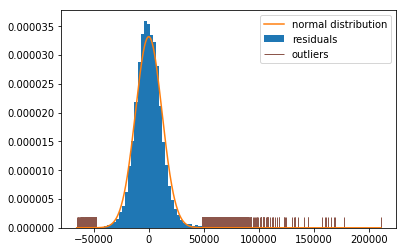

In [17]:
import scipy

plt.hist(model_all.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(model_all.resid.min(), model_all.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_all.scale)),
    label="normal distribution")
outliers = np.abs(model_all.resid)>4*np.sqrt(model_all.scale)
sns.rugplot(model_all.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

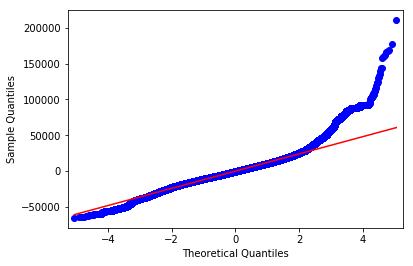

In [18]:
sm.qqplot(model_all.resid, line="s");